# ATX-DAT-2 | Codealong 08 | Answer Key

In [97]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import neighbors, metrics, grid_search, cross_validation

pd.set_option('display.max_rows', 30)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)

%matplotlib inline
plt.style.use('ggplot')

## `Iris` dataset

In [62]:
df = pd.read_csv(os.path.join('..','..', 'datasets', 'iris.csv'))

In [5]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Part A - Activity: Iris Dataset Exploratory Analysis

In [4]:
color = df.Species.map(pd.Series({'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'}))

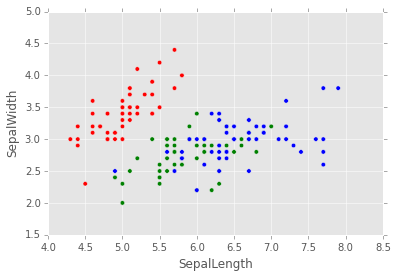

In [5]:
df.plot('SepalLength', 'SepalWidth', kind = 'scatter', c = color)

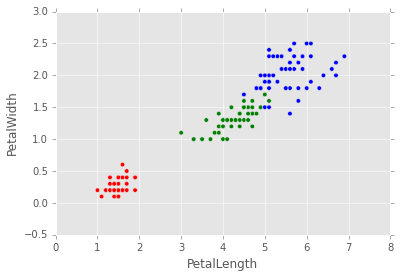

In [6]:
df.plot('PetalLength', 'PetalWidth', kind = 'scatter', c = color)

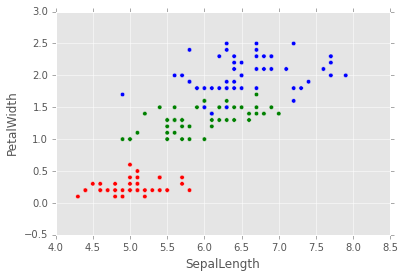

In [7]:
df.plot('SepalLength', 'PetalWidth', kind = 'scatter', c = color)

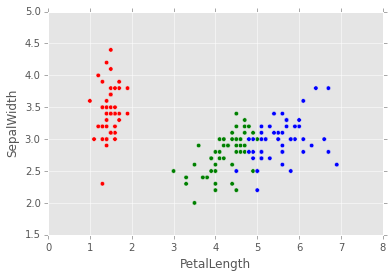

In [8]:
df.plot('PetalLength', 'SepalWidth', kind = 'scatter', c = color)

## Part B - First hand-coded classifier

In [67]:
def my_first_classifier(row):
    if row.PetalLength < 2:
        return 'Setosa'
    elif row.PetalLength>4.9:
        return "Virginica"
    else:
        return 'Versicolor'

In [68]:
y_hat = df.apply(my_first_classifier, axis = 1)

y_hat

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
dtype: object

In [69]:
species_df = pd.DataFrame({'Observed': df.Species, 'Predicted': y_hat})

species_df

,Observed,Predicted
0,Setosa,Setosa
1,Setosa,Setosa
2,Setosa,Setosa
3,Setosa,Setosa
4,Setosa,Setosa
...,...,...
145,Virginica,Virginica
146,Virginica,Virginica
147,Virginica,Virginica
148,Virginica,Virginica


## Part C - Classification metrics

### Accuracy

In [70]:
1. * sum(species_df.Predicted == species_df.Observed) / len(df)

0.9466666666666667

### Misclassification rate

In [71]:
1. * sum(species_df.Predicted != species_df.Observed) / len(df)

0.05333333333333334

## Part D - Activity: Second hand-coded classifier

In [14]:
def my_second_classifier(row):
    if row.PetalLength < 2:
        return 'Setosa'
    elif row.PetalLength > 5:
        return 'Versicolor'
    else:
        return 'Virginica'

In [15]:
y_hat = df.apply(my_second_classifier, axis = 1)

In [16]:
sum(y_hat != df.Species)

8

In [17]:
1. * sum(y_hat == df.Species) / len(df)

0.9466666666666667

## Part E

### Feature matrix and label vector

In [7]:
X = df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
y = df['Species']

In [8]:
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: Species, dtype: object

### K-Nearest Neighbors (KNN)

In [10]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
y_hat = model.predict(X)

In [12]:
species_df = pd.DataFrame({'Observed': y, 'Predicted': y_hat})

species_df

,Observed,Predicted
0,Setosa,Setosa
1,Setosa,Setosa
2,Setosa,Setosa
3,Setosa,Setosa
4,Setosa,Setosa
...,...,...
145,Virginica,Virginica
146,Virginica,Virginica
147,Virginica,Virginica
148,Virginica,Virginica


In [13]:
species_df[species_df.Predicted != species_df.Observed]

,Observed,Predicted
70,Versicolor,Virginica
72,Versicolor,Virginica
83,Versicolor,Virginica
106,Virginica,Versicolor
119,Virginica,Versicolor


In [14]:
sum(species_df.Predicted != species_df.Observed)

5

You can measure the precision of your prediction either manually or with `.score()`

In [15]:
1. * sum(species_df.Predicted == species_df.Observed) / len(df)

0.9666666666666667

In [16]:
model.score(X, y)

0.96666666666666667

# weights = 'uniform'

In [17]:
neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').fit(X, y).score(X, y)

0.96666666666666667

# weights = 'distance'

In [18]:
neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'distance').fit(X, y).score(X, y)

1.0

## Part F - What is the best value for `k`?

In [84]:
k = range(1, len(df))

score_df = pd.DataFrame({'k': k})

models = score_df.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k'], weights = 'uniform').fit(X, y), axis = 1)

models

score_df['Score'] = models.map(lambda model: model.score(X, y))

In [79]:
score_df

,k,Score
0,1,1.000000
1,2,0.980000
2,3,0.960000
3,4,0.960000
4,5,0.966667
...,...,...
144,145,0.600000
145,146,0.580000
146,147,0.580000
147,148,0.560000


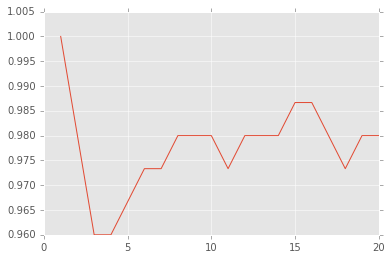

In [82]:
plt.plot(score_df.k[:20], score_df.Score[:20])

## Part G - Validation

60% of the dataset to train the model; the rest to test the model

In [131]:
train_df = df.sample(frac = .8, random_state = 0)

In [132]:
len(train_df)

120

In [133]:
test_df = df.drop(train_df.index)

In [134]:
len(test_df)

30

The error in the training set is less than the error is the test set

In [135]:
train_X = train_df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
train_y = train_df['Species']

model = neighbors.KNeighborsClassifier(n_neighbors = 7, weights = 'uniform')
model.fit(train_X, train_y)
print 'train = ', model.score(train_X, train_y)

test_X = test_df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
test_y = test_df['Species']

print 'test  = ', model.score(test_X, test_y)

train =  0.983333333333
test  =  0.9


In [136]:
k = range(1, len(train_df))

score_df = pd.DataFrame({'k': k})

models = score_df.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(train_X, train_y), axis = 1)

score_df['TrainScore'] = models.apply(lambda model: model.score(train_X, train_y))
score_df['TestScore'] = models.apply(lambda model: model.score(test_X, test_y))

In [137]:
score_df

,k,TrainScore,TestScore
0,1,1.000000,0.933333
1,2,0.966667,0.933333
2,3,0.975000,0.933333
3,4,0.975000,0.933333
4,5,0.983333,0.933333
5,6,0.983333,0.933333
6,7,0.983333,0.900000
7,8,0.983333,0.966667
8,9,0.983333,0.933333
9,10,0.975000,0.966667


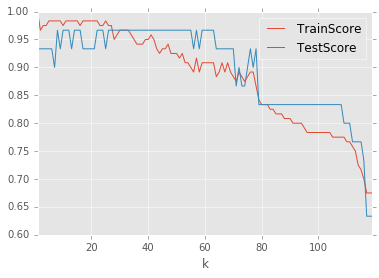

In [138]:
score_df.set_index('k').plot()

## Part H - Cross-Validation

In [139]:
len(train_df)

120

In [140]:
k_cv = 5 # 5-fold CV
k_nn = range(1, len(train_df) * (k_cv - 1) / k_cv) # k-NN

gs = grid_search.GridSearchCV(
    estimator = neighbors.KNeighborsClassifier(),
    param_grid = {'n_neighbors': k_nn},
    cv = cross_validation.KFold(len(train_df), n_folds = k_cv, random_state=0)
)

gs.fit(train_X, train_y)

score_df = pd.DataFrame({'k': [score.parameters['n_neighbors'] for score in gs.grid_scores_],
    'Score': [score.mean_validation_score for score in gs.grid_scores_]})

score_df

,Score,k
0,0.950000,1
1,0.950000,2
2,0.975000,3
3,0.966667,4
4,0.958333,5
5,0.958333,6
6,0.950000,7
7,0.958333,8
8,0.966667,9
9,0.958333,10


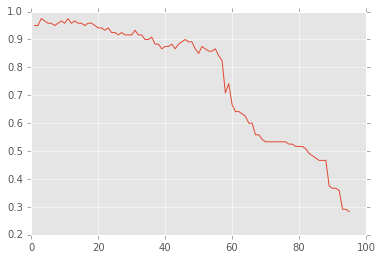

In [141]:
plt.plot(score_df.k, score_df.Score)

In [142]:
score_df[score_df.Score == score_df.Score.max()]

,Score,k
2,0.975,3
10,0.975,11


In [143]:
score_df[score_df.Score == score_df.Score.min()]
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [144]:
gs.score(test_X, test_y)

0.93333333333333335

In [ ]:
gs.